# Chargement des modules d'analyse

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
%matplotlib inline

In [3]:
plt.rc("savefig", dpi=150)

# Initialisation

In [4]:
###La durée restante pour les utilisateurs en train de communication
remainingT=[]
###le nombre de msgs echangés à chaque instant
msgsNB=[]
###le nombre total de msgs pendant une heure
nbTot=0;
###le nombre des arrivées à une instant données
arrived=[]
###le nombre des terminées à une instant données
terminated=[]

# Definition des fonctions pour generer les arrivees et le temps de service pour chacun
## le nombre dabonnees,traffic moyen par user,la duree moyenne de service,la duree du visualisation, sont des constantes qu'on peut les changer facilement au debut du programme

In [7]:
nb=3000000;
t=8.3/np.power(10,9);
dm=120;
a=nb*t #traffic=nombre de users*traffic moyen par user
lambd=a*dm
###La loi gerant le nombre des arrivées à chaque instant
def poisson(ld,instant):
    return np.power(ld,instant)*np.exp((-1)*ld)/math.factorial(instant)
def expo(ld,instant):
    return ld*np.exp((-1)*lambd*instant)     

In [8]:
def somme(liste):
    somme = 0
    for i in liste:
        somme = somme + i
    return somme

# le code pour determiner et de recuperer a chaque instant:
## le nombre darrivee
## le nombre des terminers
## le nombre de message echange avec lims
## La durée restante pour les utilisateurs en train de communication
# Il permet aussi d'avoir le nombre total des messages echanges pendant l'heure de visualisation

In [9]:
nbArrivee=0;
for i in range(3600):
    nbTerminees=0;
    nbArrivee=np.random.randint(5);
    arrived.append(nbArrivee);
    rm=[];
    if (remainingT!=[]):
        for j in range (len(remainingT)):
            remainingT[j]=remainingT[j]-1
        for j in range(0,len(remainingT)):
            if(remainingT[j]<1):
                rm.append(j);
                nbTerminees=nbTerminees+1;
        rm.sort(reverse=True);
        for k in rm:
            remainingT.pop(k);
    for j in range(nbArrivee):
        remainingT.append(expo(lambd,j))
    terminated.append(nbTerminees);
    msgsNB.append(nbArrivee*4+nbTerminees*3)
nbTot=somme(msgsNB)


# Des visualisations des resultats

In [10]:
print("le nombre total des messages echangés avec l'IMS est ",nbTot)

le nombre total des messages echangés avec l'IMS est  49471


(array([ 60., 317., 511., 558., 325., 559., 542., 383., 235., 110.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <a list of 10 Patch objects>)

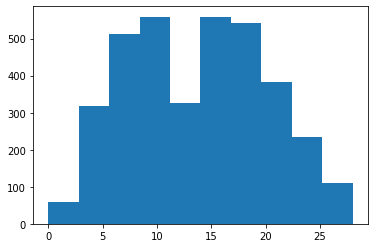

In [12]:
t=[]
for i in range(3600):
    t.append(i)
plt.hist(msgsNB,histtype='barstacked')

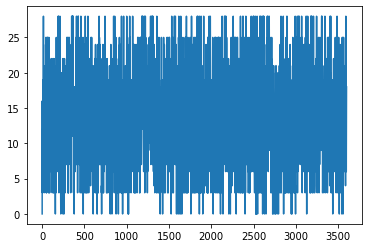

In [13]:
plt.plot(t,msgsNB)

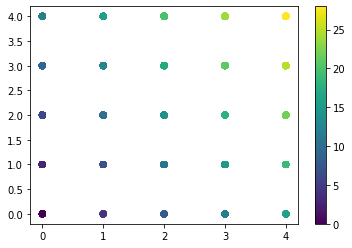

In [14]:
plt.scatter(arrived,terminated,c=msgsNB)
plt.colorbar()

In [15]:
for i in range(1000):
    print("A l'instant ",i," le nombre d'arrivees est ",arrived[i]," et le nombre des terminees est ",terminated[i]);

A l'instant  0  le nombre d'arrivees est  0  et le nombre des terminees est  0
A l'instant  1  le nombre d'arrivees est  4  et le nombre des terminees est  0
A l'instant  2  le nombre d'arrivees est  0  et le nombre des terminees est  3
A l'instant  3  le nombre d'arrivees est  0  et le nombre des terminees est  1
A l'instant  4  le nombre d'arrivees est  3  et le nombre des terminees est  0
A l'instant  5  le nombre d'arrivees est  0  et le nombre des terminees est  2
A l'instant  6  le nombre d'arrivees est  2  et le nombre des terminees est  1
A l'instant  7  le nombre d'arrivees est  1  et le nombre des terminees est  1
A l'instant  8  le nombre d'arrivees est  4  et le nombre des terminees est  1
A l'instant  9  le nombre d'arrivees est  0  et le nombre des terminees est  4
A l'instant  10  le nombre d'arrivees est  4  et le nombre des terminees est  1
A l'instant  11  le nombre d'arrivees est  2  et le nombre des terminees est  3
A l'instant  12  le nombre d'arrivees est  0  et l

time=np.linspace(0,3600,3600)
plt.plot(time,arrived,'ro')
plt.plot(time,terminated,'b--')